<a href="https://colab.research.google.com/github/armandordorica/Twitter_Sentiment_Analysis/blob/master/Covid19_NYC_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import read_csv

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

In [0]:
from pandas import read_csv


In [0]:
series = read_csv(url, header=0)


In [118]:
series[series['Combined_Key'].str.match('New York')]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
1863,84036061,US,USA,840,36061.0,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,4,11,11,12,19,25,55,95,154,269,269,463,814,1871,3954,5151,7530,9654,12305,14904,17856,21873,25573,29776,33768,37453,43119,47439,51809,57159,63306,67551,72181,76876,81803,87028,92384


In [0]:
import pandas as pd
df = pd.DataFrame(series)

In [0]:
df_ny = df.iloc[1863]

In [0]:
df_ny = pd.DataFrame(df_ny)

In [0]:
df_ny = df_ny.T

In [0]:
cols = list(df_ny.columns)

In [0]:
df_ny = df_ny[cols[10:]]

In [125]:
df_ny

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
1863,"New York City, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,4,11,11,12,19,25,55,95,154,269,269,463,814,1871,3954,5151,7530,9654,12305,14904,17856,21873,25573,29776,33768,37453,43119,47439,51809,57159,63306,67551,72181,76876,81803,87028,92384


In [0]:
list_of_dates= list(df_ny.columns)

In [127]:
len(list_of_dates)

81

In [128]:
len(values)

41

In [0]:
list_of_dates = list_of_dates[40:]

In [130]:
list(df_ny.values)

[array(['New York City, New York, US', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 11, 11, 12, 19, 25, 55, 95, 154, 269,
        269, 463, 814, 1871, 3954, 5151, 7530, 9654, 12305, 14904, 17856,
        21873, 25573, 29776, 33768, 37453, 43119, 47439, 51809, 57159,
        63306, 67551, 72181, 76876, 81803, 87028, 92384], dtype=object)]

In [131]:
values[40]

92384

In [0]:
values = list(df_ny.iloc[0])[40:]

In [0]:
data = {'Date':list_of_dates, 'Num of daily cases': values} 


In [134]:
df = pd.DataFrame(data)
df

,Date,Num of daily cases
0,3/1/20,0
1,3/2/20,1
2,3/3/20,1
3,3/4/20,1
4,3/5/20,4
5,3/6/20,11
6,3/7/20,11
7,3/8/20,12
8,3/9/20,19
9,3/10/20,25


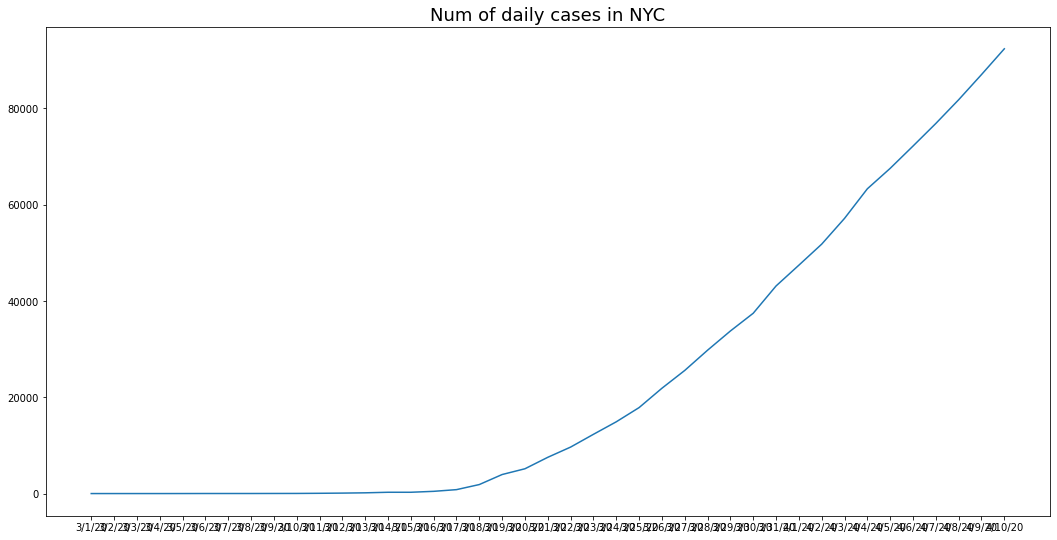

In [135]:
from matplotlib import pyplot as plt

plt.figure(figsize = (18,9))
plt.title("Num of daily cases in NYC", fontsize = 18)

plt.plot(df['Date'], df['Num of daily cases'])


In [0]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [0]:
series = df['Num of daily cases']

In [0]:
series.index = df['Date']

In [140]:
series

Date
3/1/20         0
3/2/20         1
3/3/20         1
3/4/20         1
3/5/20         4
3/6/20        11
3/7/20        11
3/8/20        12
3/9/20        19
3/10/20       25
3/11/20       55
3/12/20       95
3/13/20      154
3/14/20      269
3/15/20      269
3/16/20      463
3/17/20      814
3/18/20     1871
3/19/20     3954
3/20/20     5151
3/21/20     7530
3/22/20     9654
3/23/20    12305
3/24/20    14904
3/25/20    17856
3/26/20    21873
3/27/20    25573
3/28/20    29776
3/29/20    33768
3/30/20    37453
3/31/20    43119
4/1/20     47439
4/2/20     51809
4/3/20     57159
4/4/20     63306
4/5/20     67551
4/6/20     72181
4/7/20     76876
4/8/20     81803
4/9/20     87028
4/10/20    92384
Name: Num of daily cases, dtype: int64

In [141]:
series.shape

(41,)

In [0]:
split_point = len(series) -3
dataset, validation = series[0:split_point], series[split_point:]

In [187]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
# seasonal difference
X = dataset.values
days_in_year = 1
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(3,0,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   37
Model:                     ARMA(3, 0)   Log Likelihood                -291.697
Method:                       css-mle   S.D. of innovations            618.296
Date:                Sat, 11 Apr 2020   AIC                            593.394
Time:                        19:34:42   BIC                            601.448
Sample:                             0   HQIC                           596.233
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2262.9745   1974.990      1.146      0.260   -1607.935    6133.884
ar.L1.y        0.5383      0.160      3.369      0.002       0.225       0.852
ar.L2.y        0.2383      0.177      1.345      0.1

In [188]:
len(differenced)

37

In [0]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [191]:
from pandas import datetime
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 81407.684366


In [0]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=3)[0]

In [193]:
forecast_one_week_ahead = []
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 81407.684366
Day 2: 85943.758934
Day 3: 90456.254468


In [0]:
import numpy as np
history_np = np.array(history)

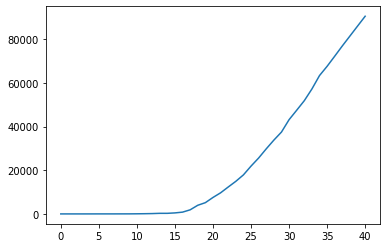

In [195]:
plt.plot(history_np)

In [196]:
len(history)

41

In [197]:
dataset

Date
3/1/20         0
3/2/20         1
3/3/20         1
3/4/20         1
3/5/20         4
3/6/20        11
3/7/20        11
3/8/20        12
3/9/20        19
3/10/20       25
3/11/20       55
3/12/20       95
3/13/20      154
3/14/20      269
3/15/20      269
3/16/20      463
3/17/20      814
3/18/20     1871
3/19/20     3954
3/20/20     5151
3/21/20     7530
3/22/20     9654
3/23/20    12305
3/24/20    14904
3/25/20    17856
3/26/20    21873
3/27/20    25573
3/28/20    29776
3/29/20    33768
3/30/20    37453
3/31/20    43119
4/1/20     47439
4/2/20     51809
4/3/20     57159
4/4/20     63306
4/5/20     67551
4/6/20     72181
4/7/20     76876
Name: Num of daily cases, dtype: int64

In [198]:
validation

Date
4/8/20     81803
4/9/20     87028
4/10/20    92384
Name: Num of daily cases, dtype: int64

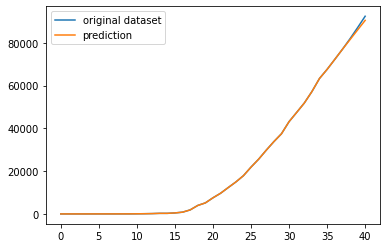

In [199]:
plt.plot(list(series)[-50:], label = 'original dataset')
plt.plot(history[-50:], label = 'prediction')
plt.legend()

What do we thing will happen in the next 5 days:

In [0]:
split_point = len(series) 
dataset, validation = series[0:split_point], series[split_point:]

In [201]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
# seasonal difference
X = dataset.values
days_in_year = 1
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(5,0,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   40
Model:                     ARMA(5, 0)   Log Likelihood                -312.773
Method:                       css-mle   S.D. of innovations            577.013
Date:                Sat, 11 Apr 2020   AIC                            639.546
Time:                        19:35:41   BIC                            651.368
Sample:                             0   HQIC                           643.821
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2622.5349   2037.920      1.287      0.207   -1371.714    6616.784
ar.L1.y        0.5539      0.150      3.688      0.001       0.260       0.848
ar.L2.y        0.3282      0.173      1.900      0.0

In [0]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [203]:
from pandas import datetime
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 97650.323856


In [0]:
# multi-step out-of-sample forecast
days_forward = 5
forecast = model_fit.forecast(steps=5)[0]

In [213]:
forecast_one_week_ahead = []
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 97650.323856
Day 2: 102993.595790
Day 3: 108345.056254
Day 4: 113630.374964
Day 5: 118866.144412


In [0]:
import numpy as np
history_np = np.array(history)

In [215]:
len(series)

41

In [0]:
days_from_today = 40

In [0]:
import datetime
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(days_from_today + days_forward)]

In [259]:
list_of_dates =  []
for i in range(0, len(date_list)):
  list_of_dates.append(date_list[i].strftime("%b-%d"))
list_of_dates

['Apr-11',
 'Apr-10',
 'Apr-09',
 'Apr-08',
 'Apr-07',
 'Apr-06',
 'Apr-05',
 'Apr-04',
 'Apr-03',
 'Apr-02',
 'Apr-01',
 'Mar-31',
 'Mar-30',
 'Mar-29',
 'Mar-28',
 'Mar-27',
 'Mar-26',
 'Mar-25',
 'Mar-24',
 'Mar-23',
 'Mar-22',
 'Mar-21',
 'Mar-20',
 'Mar-19',
 'Mar-18',
 'Mar-17',
 'Mar-16',
 'Mar-15',
 'Mar-14',
 'Mar-13',
 'Mar-12',
 'Mar-11',
 'Mar-10',
 'Mar-09',
 'Mar-08',
 'Mar-07',
 'Mar-06',
 'Mar-05',
 'Mar-04',
 'Mar-03',
 'Mar-02',
 'Mar-01',
 'Feb-29',
 'Feb-28',
 'Feb-27']

In [0]:
list_of_dates.reverse()

In [261]:
len( history[-days_from_today-days_forward:])

45

In [0]:
x_ticks= [list_of_dates[i] for i in range(0, len(list_of_dates), 5)]

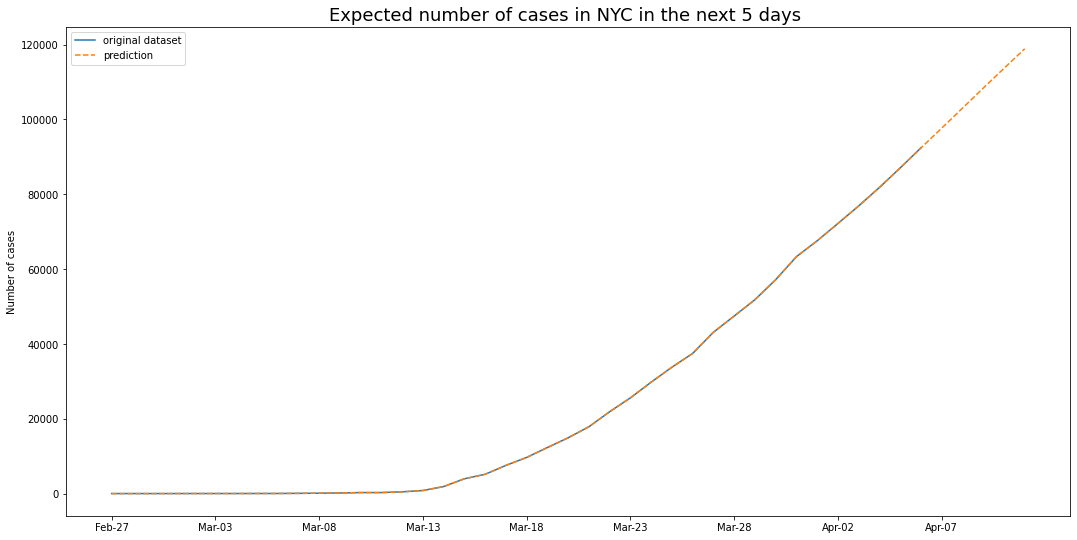

In [266]:
plt.figure(figsize = (18,9))
plt.plot(list(series)[-days_from_today:], label = 'original dataset')
plt.plot(list_of_dates, history[-days_from_today-days_forward:], label = 'prediction' , ls = 'dashed')
plt.ylabel("Number of cases")
plt.title("Expected number of cases in NYC in the next {} days ".format(days_forward), fontsize = 18)
plt.xticks(x_ticks)
plt.legend()